# Javaで推論を実行する

## コンパイルする
mavenでコンパイルする

In [2]:
!mvn clean antrun:run

[INFO] Scanning for projects...
[INFO] 
[INFO] ----------------< jp.go.digital.kanjikana:java_sample >-----------------
[INFO] Building java_sample 1.0
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-clean-plugin:2.5:clean (default-clean) @ java_sample ---
[INFO] Deleting /home/analysis01/src/kanjikana-model/sample/inference_java/target
[INFO] 
[INFO] --- maven-antrun-plugin:1.3:run (default-cli) @ java_sample ---
[INFO] Executing tasks
[INFO] Executed tasks
[INFO] ------------------------------------------------------------------------
[INFO] BUILD SUCCESS
[INFO] ------------------------------------------------------------------------
[INFO] Total time: 1.155 s
[INFO] Finished at: 2025-02-05T17:16:46+09:00
[INFO] ------------------------------------------------------------------------


In [3]:
!mvn compile assembly:single

[INFO] Scanning for projects...
[INFO] 
[INFO] ----------------< jp.go.digital.kanjikana:java_sample >-----------------
[INFO] Building java_sample 1.0
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-resources-plugin:3.2.0:resources (default-resources) @ java_sample ---
[INFO] Using 'UTF-8' encoding to copy filtered resources.
[INFO] Using 'UTF-8' encoding to copy filtered properties files.
[INFO] Copying 0 resource
[INFO] 
[INFO] --- maven-compiler-plugin:3.1:compile (default-compile) @ java_sample ---
[INFO] Changes detected - recompiling the module!
[INFO] Compiling 10 source files to /home/analysis01/src/kanjikana-model/sample/inference_java/target/classes
[WARNING] /home/analysis01/src/kanjikana-model/sample/inference_java/src/main/java/jp/go/digital/sample/Parameters.java: /home/analysis01/src/kanjikana-model/sample/inference_java/src/main/java/jp/go/digital/sample/Parameters.javaは推奨されないAPIを使用またはオーバーライドしています。
[WARNING] /hom

## 検証データを用いて実行する
Greedyサーチで検証用データを用いて、推論をおこなう

オプションの項目は次の通り

### VMオプション

-    \- -Xmx4096M

      JavaVMに4Gバイト以上のメモリを与える。これ未満での動作は保証しておらず，OutOfMemoryエラーが出る。

-    \- -Dlog4j.configureationFile

      本プログラムでは内部のロッギングにLog4jを使用している。ログ出力する際にはlog4j2.xmlを作成し，指定すること。

      なおサンプルは `log4j2.xml <https://github.com/digital-go-jp/kanjikana-model/core/log4j2.xml>`_ に記載している。

-    \- classpath

      Jarファイルまでのパスを記述する。なお，環境変数CLASSPATHにJarファイルまでのパスを記載した場合には本項目不要である。

### プログラムオプション
  
-    \--infile（デフォルト：input.txt）
      
      入力ファイル名を指定すること。

-    \--outfile（デフォルト：output.txt）

      出力ファイル名を指定すること。

-   \--kanji_idx（デフォルト：1）

      入力ファイル内における，漢字・アルファベット姓名の列の位置を指定する。１列目は0を指定し，以下，2列目は１という形で，指定すること。

-   \--kana_idx（デフォルト：2）

      入力ファイル内における，カタカナ姓名の列の位置を指定する。１列目は0を指定し，以下，2列目は１という形で，指定すること。

-    \--sep（デフォルト：csv）

      入力ファイル及び出力ファイルの列の区切り文字。csvかtsvを指定する。

-    \--thread_num（デフォルト：1）

      大量入力データなどの時に，計算を多重化して行う場合には2以上の値を指定する。CPUの数以下を推奨。1を設定した場合には多重化処理を行わない。なお，1超の値を入力した際には，出力ファイル名の末尾に".数字"がついたファイルが，thread_numで指定した数だけ作成される。
      
-    \--has_header（デフォルト：true）

      入力ファイルの１行目をヘッダ行の場合にはtrue，１行目のデータの場合にはfalseを指定する。trueを指定した際には，出力ファイルの１行目にヘッダ行が出力される。

-    \--strategy（デフォルト：ENSEMBLE）

      氏名漢字カナ突合に使用する，ストラテジを指定する。
      

        |ストラテジ          | 内容                                                                                                                                        |
        |:----------------------|:--------------------------------------------------------------------------------------------------------------------------|
        BASIC                  | 信頼度の高い辞書を用いて判定
        ENSEMBLE      |BASICを実行し，NGとなったものに対して，信頼度の高くないモデル(AI,辞書,統計)で多数決
        ONLY_AI       |ENSEMBLE内のAIモデルのみで判定
        ONLY_DICT     |ENSEMBLE内の辞書モデルのみで判定
        ONLY_STAT     |ENSEMBLE内の統計モデルのみで判定


In [4]:
!java -Xmx4096M -Dlog4j.configurationFile=log4j2.xml -classpath target/java_sample-1.0-jar-with-dependencies.jar jp.go.digital.sample.Main --test_file ../dataset/test.jsonl --model_script="../training/model/script.pt" --model_encoder="../training/model/encoder.pt" --model_decoder="../training/model/decoder.pt" --model_positional_encoding="../training/model/positional_encoding.pt" --model_generator="../training/model/generator.pt" --model_src_tok_emb="../training/model/src_tok_emb.pt" --model_tgt_tok_emb="../training/model/tgt_tok_emb.pt" --model_vocab_src="../training/model/vocab_src.txt" --model_vocab_tgt="../training/model/vocab_tgt.txt" --model_params="../training/model/params.json" --out_file="output.txt" --n_best=5 --beam_width=5 --max_len=100 --search_type="greedy"


2025-02-05T08:17:02.032869329Z main ERROR Reconfiguration failed: No configuration found for '2cdf8d8a' at 'null' in 'null'
17:17:02.240 [main] DEBUG ai.djl.repository.zoo.DefaultModelZoo -- Scanning models in repo: class ai.djl.repository.SimpleRepository, file:/home/analysis01/src/kanjikana-model/sample/inference_java/../training/model/encoder.pt
17:17:02.246 [main] DEBUG ai.djl.engine.Engine -- Registering EngineProvider: PyTorch
17:17:02.247 [main] DEBUG ai.djl.engine.Engine -- Found default engine: PyTorch
17:17:02.535 [main] INFO ai.djl.util.Ec2Utils -- DJL will collect telemetry to help us better understand our users’ needs, diagnose issues, and deliver additional features. If you would like to learn more or opt-out please go to: https://docs.djl.ai/docs/telemetry.html for more information.
17:17:02.538 [main] DEBUG ai.djl.repository.zoo.ModelZoo -- Loading model with Criteria:
	Application: UNDEFINED
	Input: class ai.djl.ndarray.NDList
	Output: class ai.djl.ndarray.NDList
	Engi

## 推論結果の評価

推論で出力された翻訳結果を、Bleuスコアで評価する。

### 出力結果
出力のoutput.txtはTSV形式で下記の用に保存されている。


```tsv
no	search	src	tgt	pred	prob
0	greedy	A new difficulty has arisen.	Une nouvelle difficulté est apparue.	Un peu de mon amis de l'aide.	-25.770613057685175
1	greedy	It's not going to end well.	Ça ne va pas bien se terminer.	Ce n'est pas le faire de la maison.	-16.37295488919627
```
各項目は次の通りである。
- no    
通し番号

- search    
サーチのタイプ。今回はgreedyサーチ

- src    
モデルへの入力文章

- tgt     
翻訳の正解

- pred    
greedyサーチによって出力された推論結果

- prob    
predで出力された文章のモデルから出力された確率


### 評価
NLTKライブラリを用いて、評価を行う


In [20]:
# https://thepythoncode.com/article/bleu-score-in-python

from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import pandas as pd
from nltk.tokenize import word_tokenize

In [21]:
df = pd.read_csv('output.txt',sep='\t')


In [22]:
tgt=[s.strip() for s in df['tgt'].tolist()]
pred=[s.strip() for s in df['pred'].tolist()]

In [23]:

score=[]
tokenizer=lambda x: word_tokenize(x, language='english')

for t,p in zip(tgt,pred):
    ref = tokenizer(t)
    hyp = tokenizer(p)
    s=sentence_bleu([ref],hyp, smoothing_function=SmoothingFunction().method3)
    score.append(s)

In [24]:
import statistics

statistics.mean(score)

0.36683025095897687

In [13]:
statistics.median(score)

0.23875171324177327

In [14]:
max(score)

1.0

In [15]:
min(score)

0

In [17]:
import scipy

scipy.stats.mstats.mquantiles(score)

array([0.11990148, 0.23875171, 0.51150781])

In [18]:
import matplotlib.pyplot as plt

(array([2665., 3279., 1737., 1407.,  969.,  759.,  368.,  222.,   72.,
        2106.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

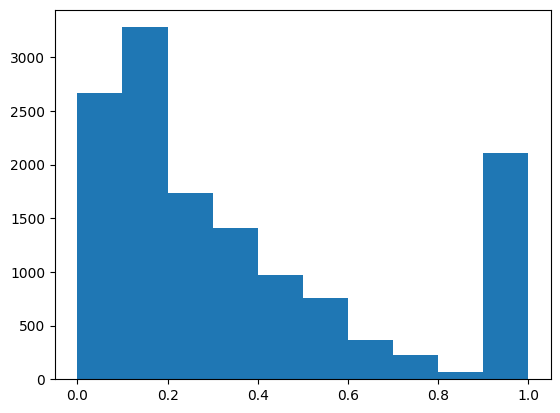

In [19]:
plt.hist(score)